In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/Evaluation_Week1/census_income.csv", sep=' *, *', na_values='?')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
categorial_features = df.select_dtypes(include=[np.object])
#frequency of categories
for col in categorial_features:
    print(df[col].value_counts())
    

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                365

In [5]:
df.isnull().sum()
#But I see some question marks, Need more inerogation!!

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [6]:
print(df.shape)
categorial_features.columns

(32560, 15)


Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

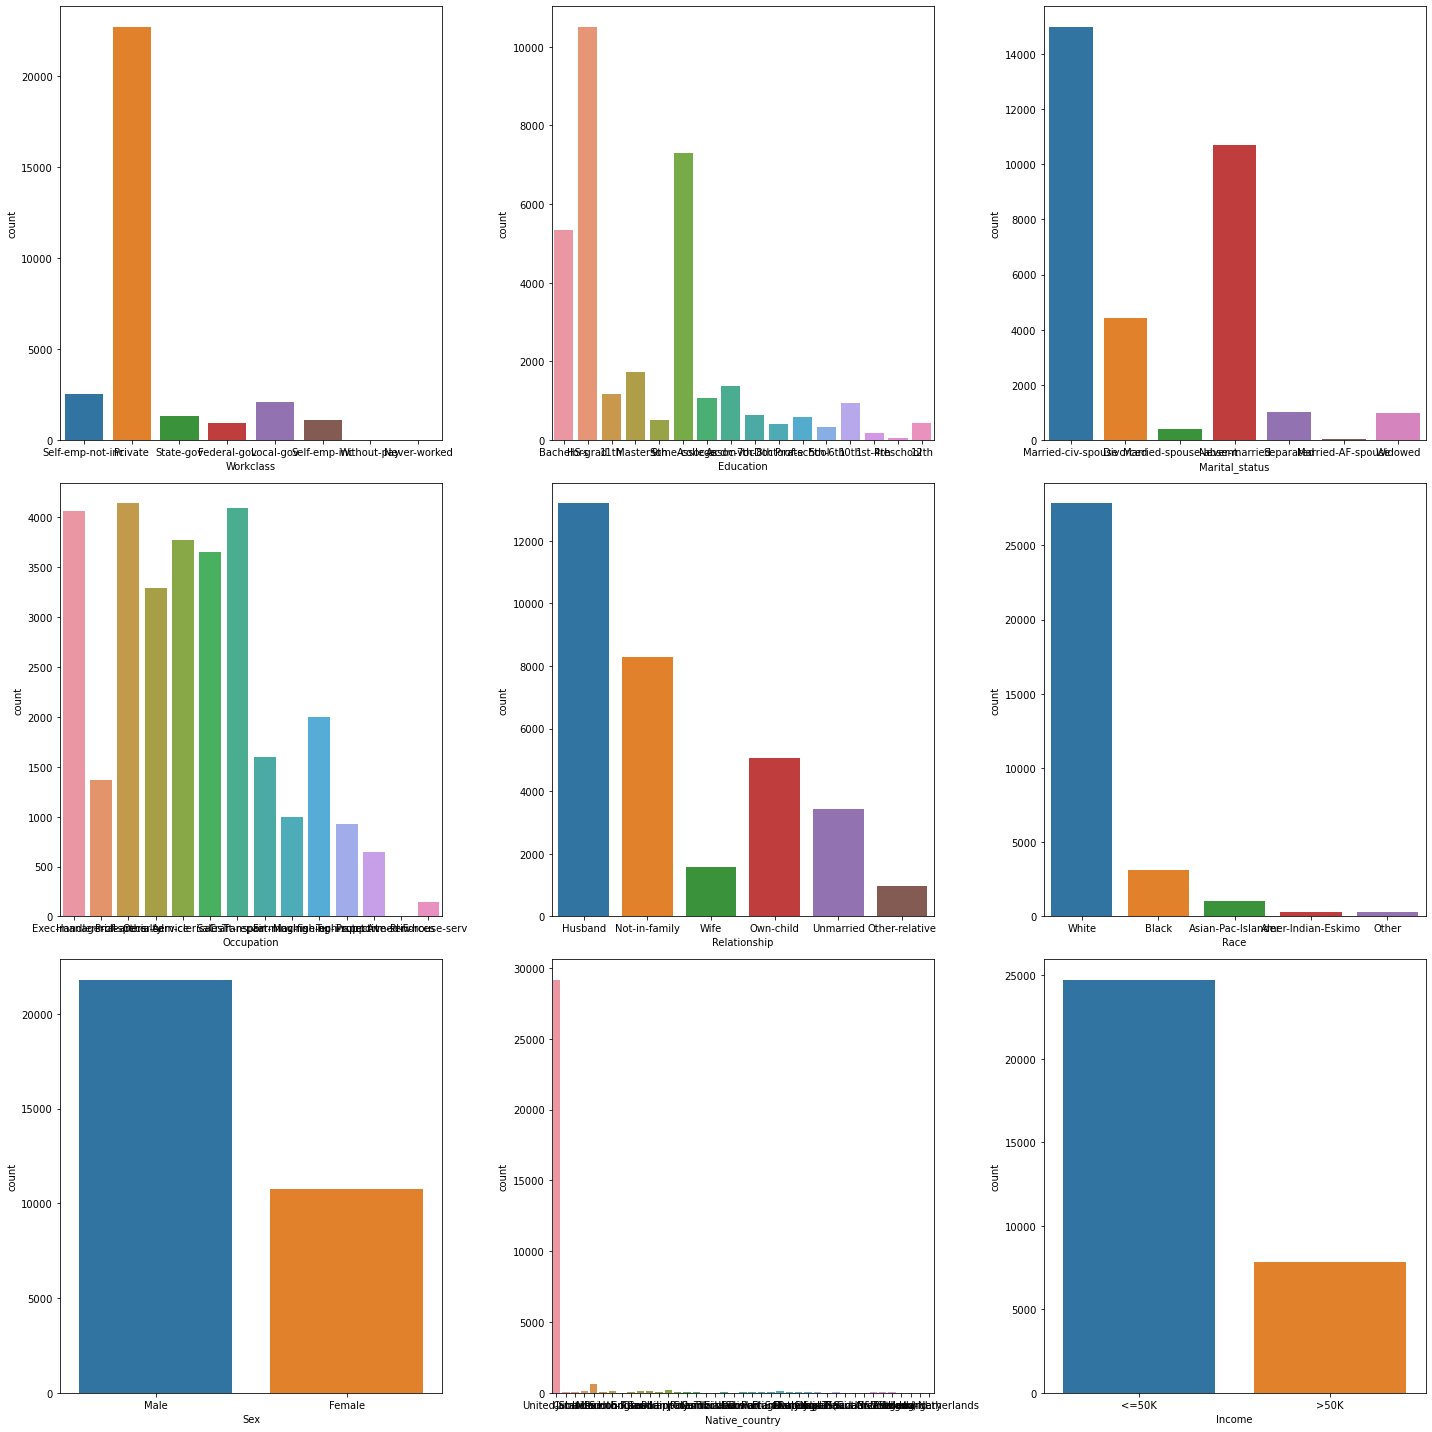

In [7]:
categorial_features.columns
#Ploting the catogorical variables
#Checking the variables
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in categorial_features:
    if plotnumber<=12:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()  

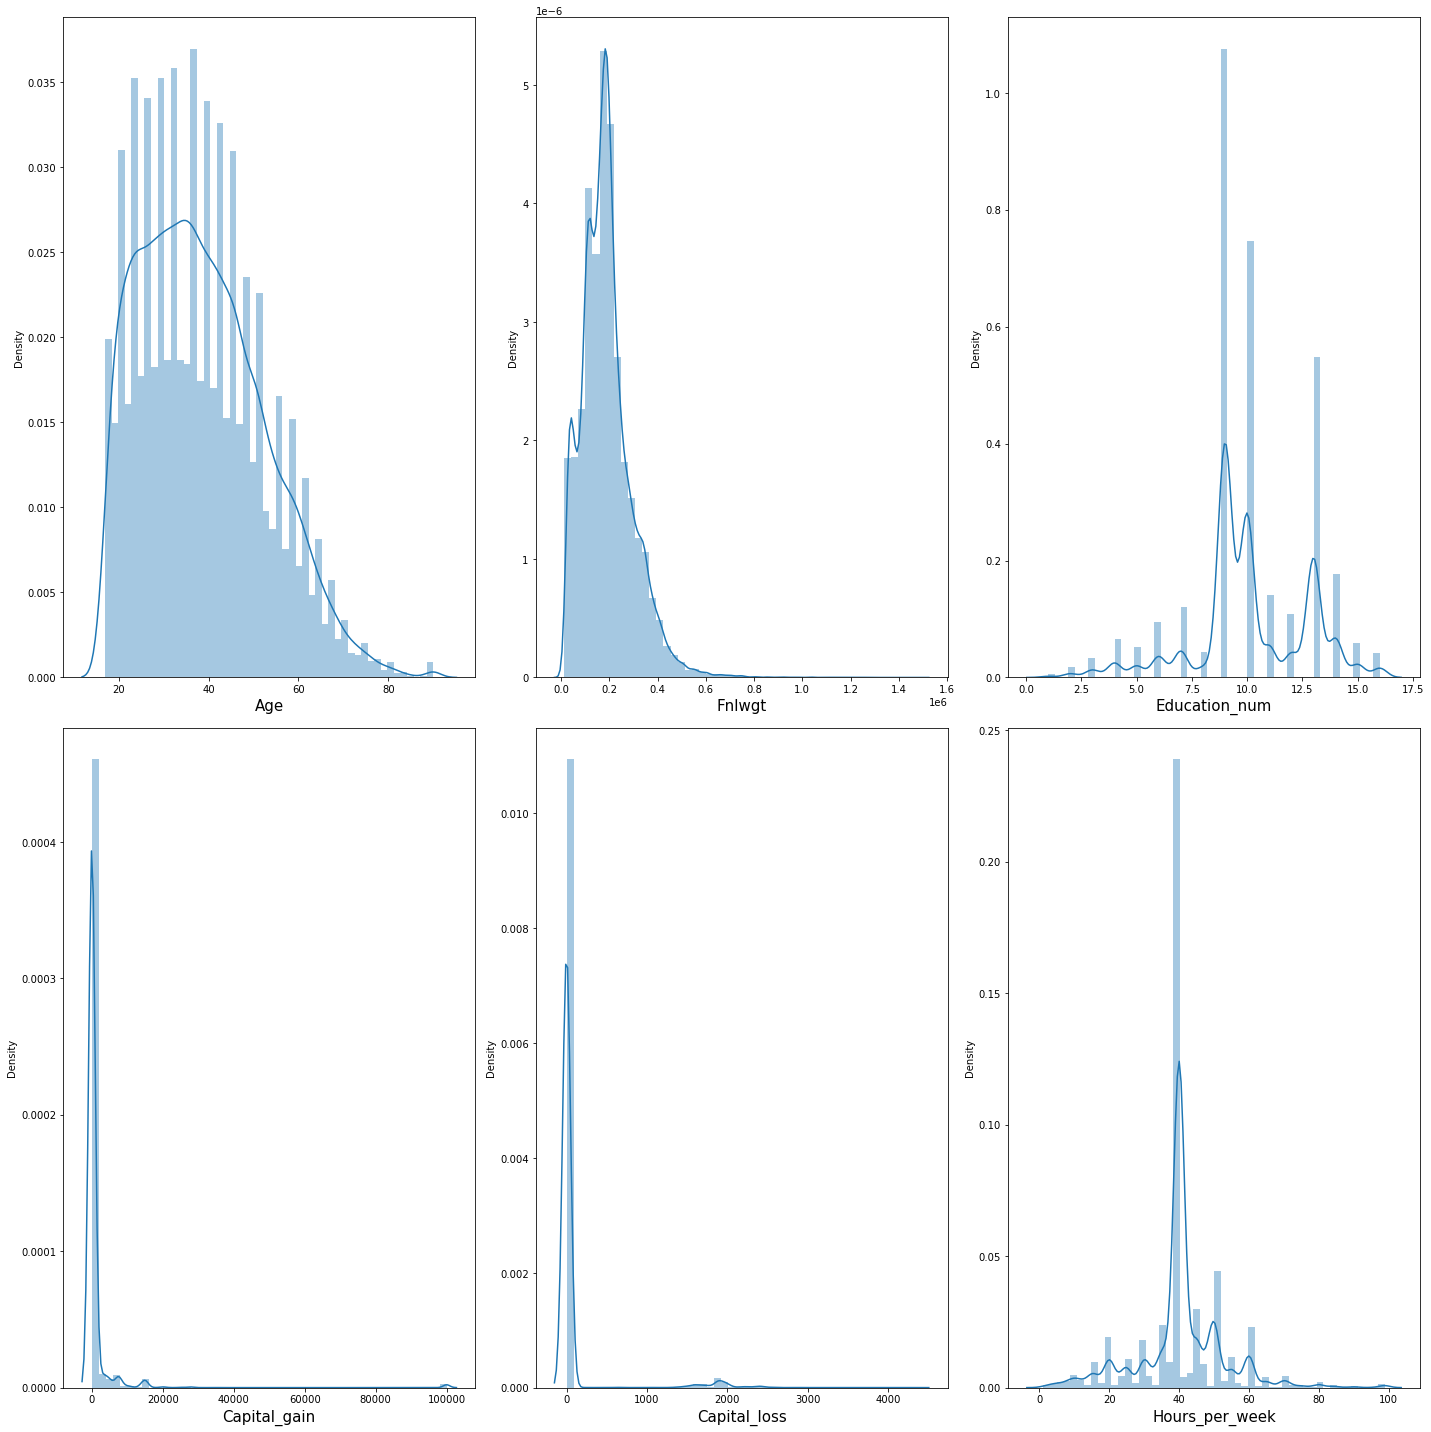

In [8]:
Numerical_features = df.select_dtypes(include=[np.int64])
#Checking for distribution of Null values

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in Numerical_features:
    if plotnumber<=12:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [9]:
df.describe()
#I see lot of ouliers and screwness in the data
#Capital gain and Capital Losses are screwed

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
#Trying to Impute the missing values
df_new=pd.DataFrame({})
df_new['Workclass']=df['Workclass']
df_new['Occupation']=df['Occupation']
a=df_new.loc[df_new.isnull().any(axis=1)]
print(a.shape)
#This shows that all the values which are null in one column is also null in another column

(1843, 2)


In [11]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN, strategy="most_frequent" )

#Impute values for Columns
df.Workclass=imp.fit_transform(df["Workclass"].values.reshape(-1,1))[:,0]
df.Occupation=imp.fit_transform(df["Occupation"].values.reshape(-1,1))[:,0]
df.Native_country=imp.fit_transform(df["Native_country"].values.reshape(-1,1))[:,0]
df.info()
#All the Null values are treated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
#will Drop Education, as same information is provided my Eductaion_num
df=df.drop(['Education'], axis=1)

In [13]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()

df['Workclass']=LE.fit_transform(df['Workclass'])
df['Marital_status']=LE.fit_transform(df['Marital_status'])
df['Occupation']=LE.fit_transform(df['Occupation'])
df['Relationship']=LE.fit_transform(df['Relationship'])
df['Race']=LE.fit_transform(df['Race'])
df['Sex']=LE.fit_transform(df['Sex'])
df['Native_country']=LE.fit_transform(df['Native_country'])

In [14]:
df['Income'].value_counts()

<=50K    24719
>50K      7841
Name: Income, dtype: int64

In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['Income']=oe.fit_transform((df['Income']).values.reshape(-1,1))[:,0]

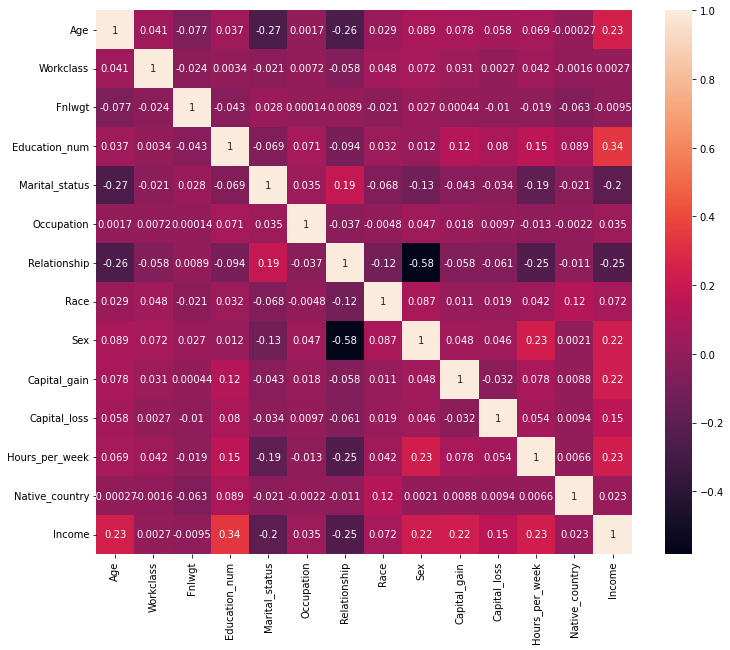

In [16]:
#The Data is cleaned
#Check for Correlation between the Features and target
Corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(Corr,annot=True)
plt.show()
#Show very less correlation between the features and Target

In [17]:
#Multicollinearity check
x=df.drop(columns=['Income'],axis=1)
y=df['Income']

In [18]:
#Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns


vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

           feature        VIF
0              Age   8.847379
1        Workclass   8.425970
2           Fnlwgt   4.040862
3    Education_num  15.786855
4   Marital_status   4.078211
5       Occupation   3.376226
6     Relationship   2.667860
7             Race  17.860951
8              Sex   4.498006
9     Capital_gain   1.044541
10    Capital_loss   1.061554
11  Hours_per_week  11.966711
12  Native_country  28.313219


In [19]:
#Would check for the best features and delet accordingly
#Will check which variable is more likely to drop
#As there is lot of Multicollinearily I will use Top 3 features 
from sklearn.feature_selection import SelectKBest, f_classif
best_features=SelectKBest(score_func=f_classif, k=10)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feaures_scores=pd.concat([df_scores,df_columns], axis=1)
feaures_scores.columns=['Score','feature Name']
feaures_scores.sort_values(['Score'], ascending=False)

,Score,feature Name
3,4120.741694,Education_num
6,2187.696334,Relationship
0,1886.677918,Age
11,1813.339094,Hours_per_week
9,1709.157677,Capital_gain
8,1593.288816,Sex
4,1346.636300,Marital_status
10,754.777449,Capital_loss
7,168.964252,Race
5,39.022150,Occupation


In [20]:
#So based on the abve 2 parameters
#Drop-The 4 lowest contributers
x=x.drop(columns=['Workclass'],axis=1)
x=x.drop(columns=['Fnlwgt'],axis=1)
x=x.drop(columns=['Native_country'],axis=1)
x=x.drop(columns=['Occupation'],axis=1)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns


vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

          feature        VIF
0             Age   8.052936
1   Education_num  13.855694
2  Marital_status   3.813698
3    Relationship   2.451100
4            Race  14.687229
5             Sex   4.279664
6    Capital_gain   1.042353
7    Capital_loss   1.060829
8  Hours_per_week  11.308795


In [22]:
x=x.drop(columns=['Race'],axis=1)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns


vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

          feature        VIF
0             Age   7.296004
1   Education_num  12.445904
2  Marital_status   3.665270
3    Relationship   2.350247
4             Sex   4.083277
5    Capital_gain   1.039948
6    Capital_loss   1.060621
7  Hours_per_week  10.618562


#Descided that bot are equally important and VIF values/Multicollinearity is not very large, Will go ahead with teh model

In [24]:
#Would remove the outliers in Capital_gain and Capital_loss which are extreamly right screwed
Numerical_features.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

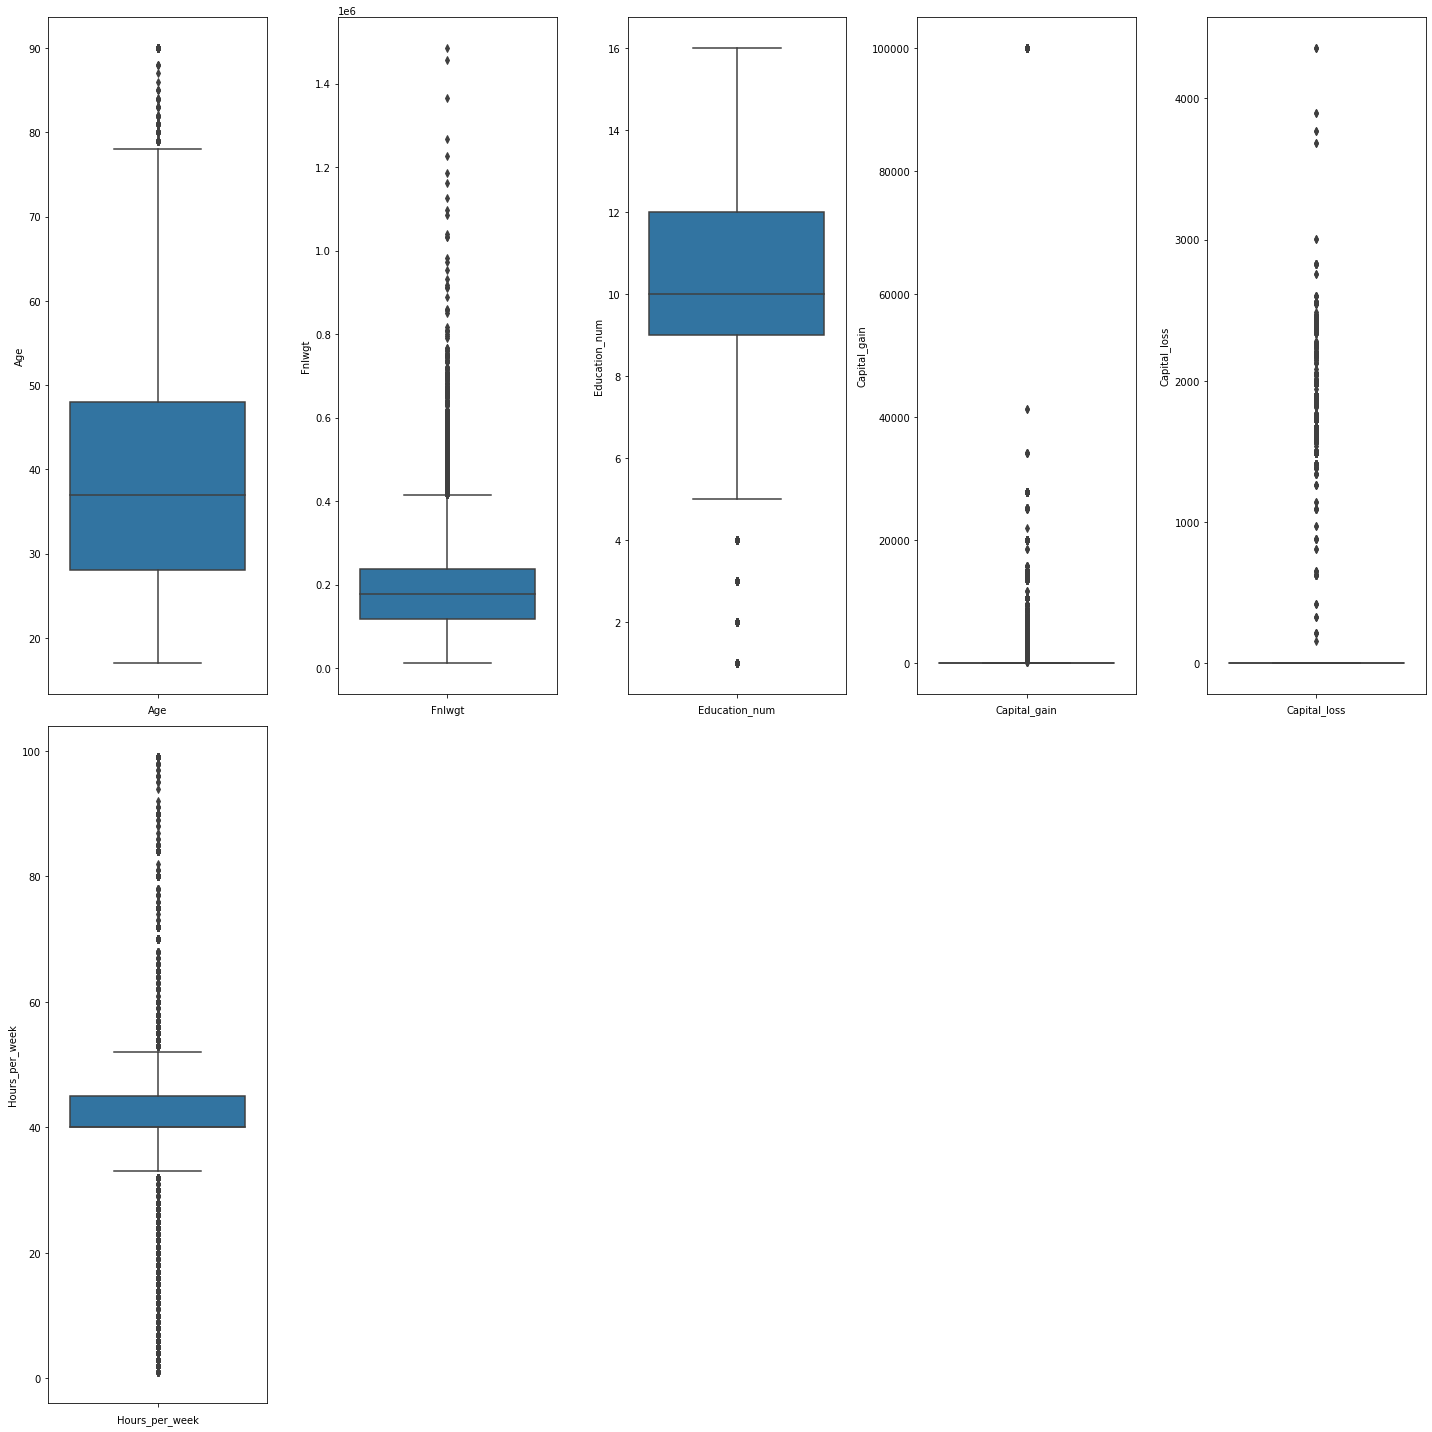

In [25]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.boxplot(y=Numerical_features[column],orient="h")
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()  

#Capital gain and Capital might have xtreame value, and theer are not real errors or outliers and using outliers is deleting arount 300 rows which I would not prefer
Q1=x['Capital_gain'].quantile(0.25)
Q3=x['Capital_gain'].quantile(0.75)
IQR=Q3-Q1
a=(Q3 + 1.5 * IQR)
index=np.where(x['Capital_gain']>a)
x=x.drop(x.index[index])
x.reset_index()
print('outlier above-',a)
#print('indexs deleetd',index)
print(x.shape)
print(df.shape)

In [26]:
x.skew()

Age                0.558738
Education_num     -0.311630
Marital_status    -0.013448
Relationship       0.786784
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [27]:
from sklearn.preprocessing import power_transform
df6=pd.DataFrame(df['Capital_gain'])
df6=power_transform(df6)
df_new=pd.DataFrame(df6,columns=['Capital_gain'])
x['Capital_gain']=df_new['Capital_gain']

In [28]:
from sklearn.preprocessing import power_transform
df6=pd.DataFrame(df['Capital_loss'])
df6=power_transform(df6)
df_new=pd.DataFrame(df6,columns=['Capital_loss'])
x['Capital_loss']=df_new['Capital_loss']

In [29]:
x.skew()
#Will go ahead with this screwness

Age               0.558738
Education_num    -0.311630
Marital_status   -0.013448
Relationship      0.786784
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
dtype: float64

In [30]:
y.value_counts()
#Imbalanced dataset

0.0    24719
1.0     7841
Name: Income, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE

oversample=SMOTE(0.8,k_neighbors=5)
x_smoted, y_smoted=oversample.fit_resample(x,y)

# summarize distribution
counter = y_smoted.value_counts()
for k,v in counter.items():
    per = v / len(y_smoted) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
#THE dataSET IS BALANCED NOW, 

Class=0, n=24719 (55.556%)
Class=1, n=19775 (44.444%)


In [32]:
#Scale the fetures
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_smoted)
x_scaled

array([[ 0.76176055,  0.99927025, -0.32883016, ..., -0.36549101,
        -0.25263655, -2.34478276],
       [-0.15637387, -0.562112  , -1.79441856, ..., -0.36549101,
        -0.25263655, -0.14702194],
       [ 0.99129416, -1.34280312, -0.32883016, ..., -0.36549101,
        -0.25263655, -0.14702194],
       ...,
       [ 1.52687257, -0.562112  , -0.32883016, ..., -0.36549101,
         3.99385286, -0.14702194],
       [-0.61544109,  1.38961582,  1.13675825, ..., -0.36549101,
        -0.25263655, -0.14702194],
       [ 1.22082776,  0.99927025, -0.32883016, ...,  2.7656601 ,
        -0.25263655,  0.66696354]])

In [33]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y_smoted,test_size=0.25, random_state=100)

In [34]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      6151
         1.0       0.76      0.87      0.81      4973

    accuracy                           0.82     11124
   macro avg       0.82      0.83      0.82     11124
weighted avg       0.83      0.82      0.82     11124



In [35]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85      6151
         1.0       0.81      0.85      0.83      4973

    accuracy                           0.84     11124
   macro avg       0.84      0.84      0.84     11124
weighted avg       0.84      0.84      0.84     11124



In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83      6151
         1.0       0.78      0.83      0.81      4973

    accuracy                           0.82     11124
   macro avg       0.82      0.82      0.82     11124
weighted avg       0.82      0.82      0.82     11124



In [37]:
# Crossvalidation score also show there is no overfitting isse
from sklearn.model_selection import cross_val_score
CS_RF=cross_val_score(RF,x_scaled,y_smoted,cv=5)
CS_RF.mean()

0.8424285008978283

Will Go AHEAD WITH RF Model

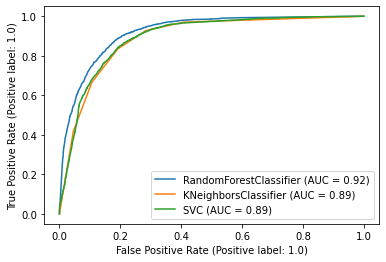

In [38]:
from sklearn.metrics import plot_roc_curve

classifiers = [RF, knn ,svc ]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax)

In [39]:
with open("RF", "wb") as f:
    pickle.dump(RF, f)